## 1. Importing Libraries


In [170]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, confusion_matrix, accuracy_score, f1_score, precision_score,recall_score
import seaborn as sns

## 2. Loading and Exploring the Data

In [117]:
df = pd.read_csv('data/data.csv')

In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128061 entries, 0 to 128060
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Age                 128061 non-null  float64
 1   Gender              128061 non-null  object 
 2   Education           128061 non-null  int64  
 3   Introversion Score  128061 non-null  float64
 4   Sensing Score       128061 non-null  float64
 5   Thinking Score      128061 non-null  float64
 6   Judging Score       128061 non-null  float64
 7   Interest            128061 non-null  object 
 8   Personality         128061 non-null  object 
dtypes: float64(5), int64(1), object(3)
memory usage: 8.8+ MB


In [119]:
df.head()

,Age,Gender,Education,Introversion Score,Sensing Score,Thinking Score,Judging Score,Interest,Personality
0,19.0,Male,0,9.47080,7.141434,6.03696,4.360278,Unknown,ENFP
1,27.0,Female,0,5.85392,6.160195,0.80552,4.221421,Sports,ESFP
2,21.0,Female,0,7.08615,3.388433,2.66188,5.127320,Unknown,ENFP
3,28.0,Male,0,2.01892,4.823624,7.30625,5.986550,Others,INTP
4,36.0,Female,1,9.91703,4.755080,5.31469,4.677213,Technology,ENFP


## 3. Scaling or Normalizing Data

In [120]:
from sklearn.preprocessing import LabelEncoder

lbl_encoder = LabelEncoder()

df.loc[:,'Gender'] = lbl_encoder.fit_transform(df['Gender'].values)
df.loc[:,'Interest'] = lbl_encoder.fit_transform(df['Interest'].values)

## 4. Model Building and Training


In [122]:
x_train, x_test, y_train, y_test = train_test_split(df.drop(columns='Personality'), df['Personality'],test_size=0.3)

In [127]:
le = LabelEncoder()
le.fit(df['Personality'])
y_test_encoded = le.transform(y_test)

In [128]:
def encoder_predictions(predictions):
    predictions = le.transform(predictions)
    classes = le.classes_
    return classes, predictions

In [129]:
def generate_matrix_confusion(model, predictions):
    classes, predictions = encoder_predictions(predictions)
    cm = confusion_matrix(y_test_encoded,predictions)
    
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=classes, yticklabels=classes)
    plt.xlabel('Predict Label')
    plt.ylabel('True Label')
    plt.title(f"Confusion Matrix - {model.__class__.__name__} - {model.__getattribute__('solver')} - {model.__getattribute__('class_weight')}")
    plt.show()

In [181]:
list_report = []
def report_model(model, predictions):
    _ , predictions = encoder_predictions(predictions)
    model_name = f"{model.__class__.__name__} - {model.__getattribute__('solver')} - {model.__getattribute__('class_weight')}"
    print(model_name)
    
    accuracy = accuracy_score(y_test_encoded, predictions)
    f1score = f1_score(y_test_encoded, predictions, average='weighted')  # o average='macro'
    precision = precision_score(y_test_encoded, predictions, average='weighted')  # o average='macro'
    recall = recall_score(y_test_encoded, predictions, average='weighted')  # o average='macro'
    
    list_report.append([ model_name,accuracy, f1score, precision,recall])
    
    print(classification_report(y_test_encoded, predictions))

### newton-cg

In [142]:
log_reg_1 = LogisticRegression(solver='newton-cg')

log_reg_1.fit(x_train,y_train)
predictions_1 = log_reg_1.predict(x_test)

In [182]:
report_model(log_reg_1, predictions_1)

LogisticRegression - newton-cg - None
              precision    recall  f1-score   support

           0       0.79      0.75      0.77      1228
           1       0.86      0.89      0.87     10228
           2       0.80      0.78      0.79       866
           3       0.85      0.88      0.87      7462
           4       0.61      0.47      0.53       162
           5       0.70      0.58      0.63      1444
           6       0.59      0.55      0.57       112
           7       0.68      0.52      0.59      1001
           8       0.80      0.75      0.77       881
           9       0.85      0.87      0.86      7350
          10       0.79      0.73      0.76       579
          11       0.83      0.86      0.85      5169
          12       0.55      0.44      0.49        94
          13       0.66      0.54      0.59      1030
          14       0.58      0.40      0.47        78
          15       0.67      0.54      0.59       735

    accuracy                           0.8

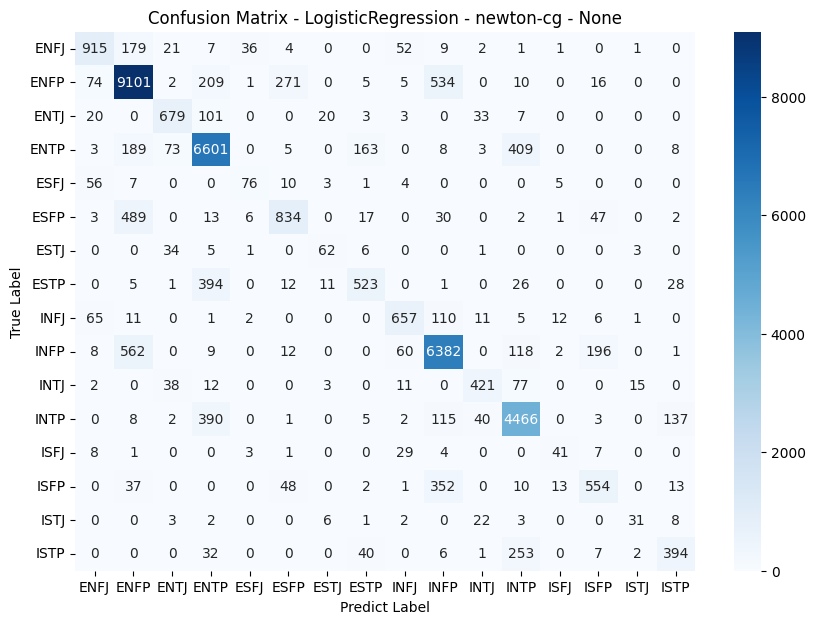

In [144]:
generate_matrix_confusion(log_reg_1, predictions_1)

### newton-cg balanced

In [141]:
log_reg_2 = LogisticRegression(solver='newton-cg', class_weight='balanced')

log_reg_2.fit(x_train,y_train)
predictions_2 = log_reg_2.predict(x_test)

In [183]:
report_model(log_reg_2, predictions_2)

LogisticRegression - newton-cg - balanced
              precision    recall  f1-score   support

           0       0.53      0.74      0.62      1228
           1       0.92      0.75      0.83     10228
           2       0.51      0.76      0.61       866
           3       0.91      0.76      0.82      7462
           4       0.33      0.84      0.48       162
           5       0.55      0.82      0.66      1444
           6       0.30      0.82      0.44       112
           7       0.54      0.81      0.65      1001
           8       0.52      0.76      0.62       881
           9       0.88      0.77      0.82      7350
          10       0.48      0.76      0.59       579
          11       0.85      0.77      0.81      5169
          12       0.23      0.74      0.35        94
          13       0.52      0.79      0.63      1030
          14       0.27      0.79      0.40        78
          15       0.51      0.82      0.63       735

    accuracy                          

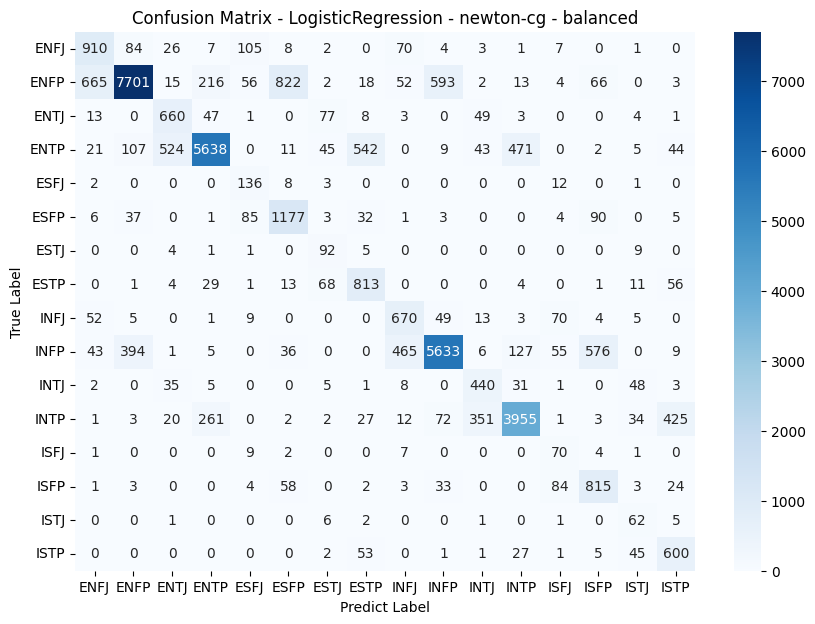

In [145]:
generate_matrix_confusion(log_reg_2, predictions_2)

### sag

In [ ]:
log_reg_3 = LogisticRegression(solver='sag')

log_reg_3.fit(x_train,y_train)
predictions_3 = log_reg_3.predict(x_test)

In [184]:
report_model(log_reg_3, predictions_3)

LogisticRegression - sag - None
              precision    recall  f1-score   support

           0       0.03      0.03      0.03      1228
           1       0.26      0.27      0.26     10228
           2       0.02      0.02      0.02       866
           3       0.19      0.20      0.19      7462
           4       0.00      0.00      0.00       162
           5       0.04      0.03      0.03      1444
           6       0.00      0.00      0.00       112
           7       0.02      0.02      0.02      1001
           8       0.02      0.02      0.02       881
           9       0.20      0.21      0.20      7350
          10       0.01      0.01      0.01       579
          11       0.13      0.14      0.14      5169
          12       0.00      0.00      0.00        94
          13       0.03      0.03      0.03      1030
          14       0.00      0.00      0.00        78
          15       0.02      0.01      0.02       735

    accuracy                           0.17     

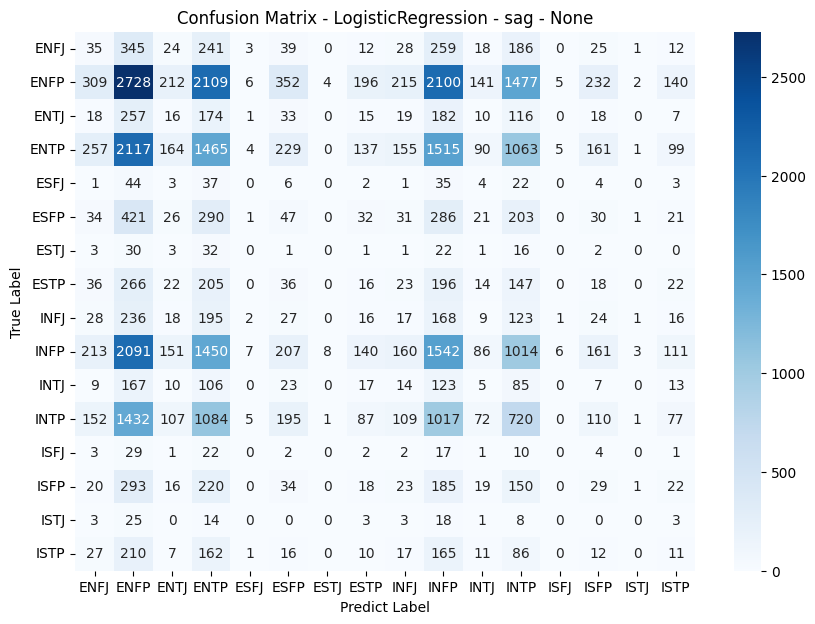

In [133]:
generate_matrix_confusion(log_reg_3, predictions_3)

### sag balanced

In [ ]:
log_reg_4 = LogisticRegression(solver='sag', class_weight='balanced')

log_reg_4.fit(x_train,y_train)
predictions_4 = log_reg_4.predict(x_test)

In [185]:
report_model(log_reg_4, predictions_4)

LogisticRegression - sag - balanced
              precision    recall  f1-score   support

           0       0.03      0.05      0.04      1228
           1       0.26      0.20      0.22     10228
           2       0.00      0.00      0.00       866
           3       0.19      0.05      0.08      7462
           4       0.00      0.01      0.00       162
           5       0.04      0.04      0.04      1444
           6       0.00      0.11      0.01       112
           7       0.03      0.14      0.05      1001
           8       0.03      0.02      0.02       881
           9       0.20      0.23      0.21      7350
          10       0.02      0.01      0.01       579
          11       0.09      0.00      0.01      5169
          12       0.01      0.02      0.01        94
          13       0.02      0.01      0.01      1030
          14       0.00      0.01      0.01        78
          15       0.02      0.12      0.03       735

    accuracy                           0.12 

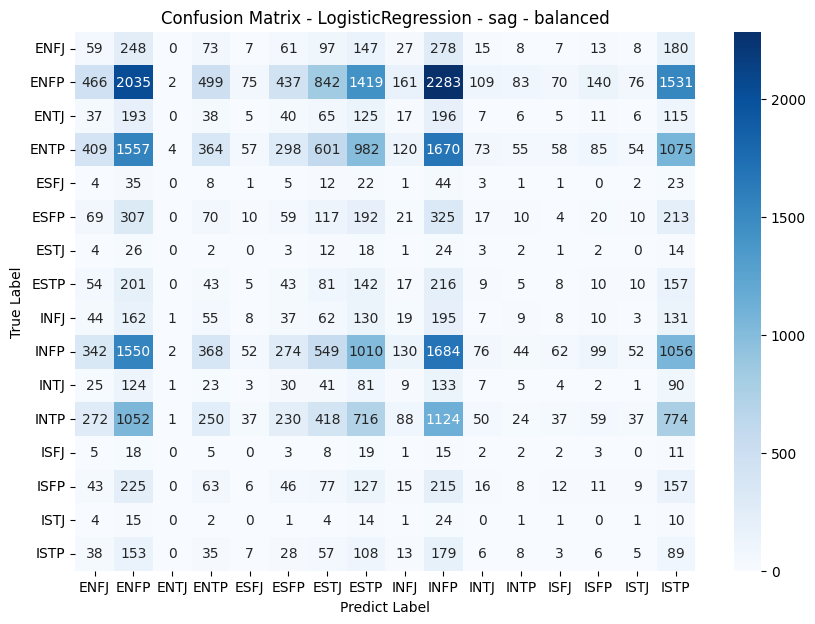

In [134]:
generate_matrix_confusion(log_reg_4, predictions_4)

### saga

In [ ]:
log_reg_5 = LogisticRegression(solver='saga')

log_reg_5.fit(x_train,y_train)
predictions_5 = log_reg_5.predict(x_test)

In [186]:
report_model(log_reg_5, predictions_5)

LogisticRegression - saga - None
              precision    recall  f1-score   support

           0       0.03      0.03      0.03      1228
           1       0.26      0.27      0.26     10228
           2       0.02      0.02      0.02       866
           3       0.19      0.20      0.19      7462
           4       0.00      0.00      0.00       162
           5       0.04      0.03      0.03      1444
           6       0.00      0.00      0.00       112
           7       0.03      0.02      0.02      1001
           8       0.02      0.02      0.02       881
           9       0.20      0.21      0.20      7350
          10       0.01      0.01      0.01       579
          11       0.13      0.14      0.14      5169
          12       0.00      0.00      0.00        94
          13       0.03      0.03      0.03      1030
          14       0.00      0.00      0.00        78
          15       0.02      0.01      0.02       735

    accuracy                           0.18    

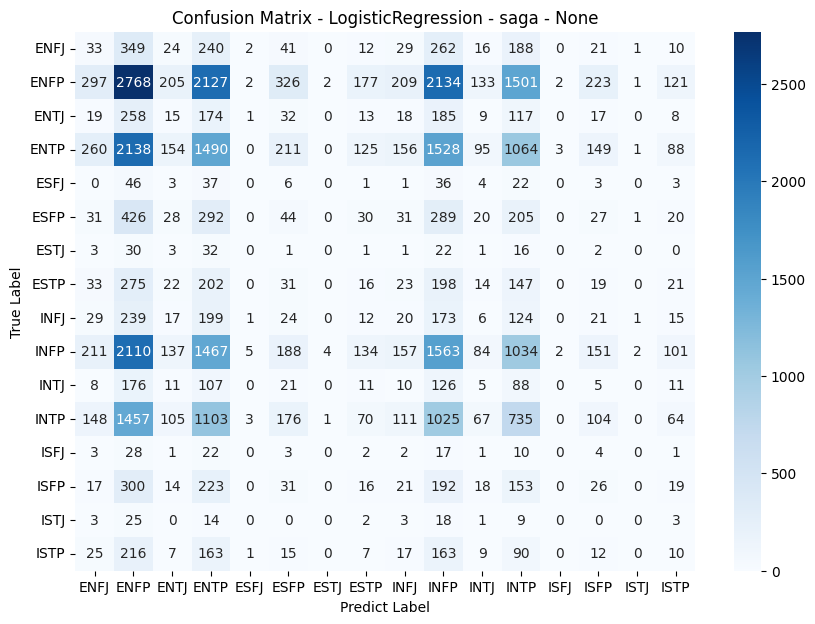

In [136]:
generate_matrix_confusion(log_reg_5, predictions_5)

### saga balanced

In [ ]:
log_reg_6 = LogisticRegression(solver='saga', class_weight='balanced')

log_reg_6.fit(x_train,y_train)
predictions_6 = log_reg_6.predict(x_test)

In [187]:
report_model(log_reg_6, predictions_6)

LogisticRegression - saga - balanced
              precision    recall  f1-score   support

           0       0.03      0.04      0.03      1228
           1       0.26      0.20      0.22     10228
           2       0.02      0.03      0.03       866
           3       0.19      0.15      0.17      7462
           4       0.00      0.01      0.00       162
           5       0.04      0.06      0.05      1444
           6       0.00      0.00      0.00       112
           7       0.03      0.09      0.04      1001
           8       0.03      0.03      0.03       881
           9       0.20      0.17      0.18      7350
          10       0.01      0.03      0.02       579
          11       0.13      0.10      0.11      5169
          12       0.00      0.02      0.00        94
          13       0.03      0.04      0.03      1030
          14       0.00      0.00      0.00        78
          15       0.02      0.02      0.02       735

    accuracy                           0.14

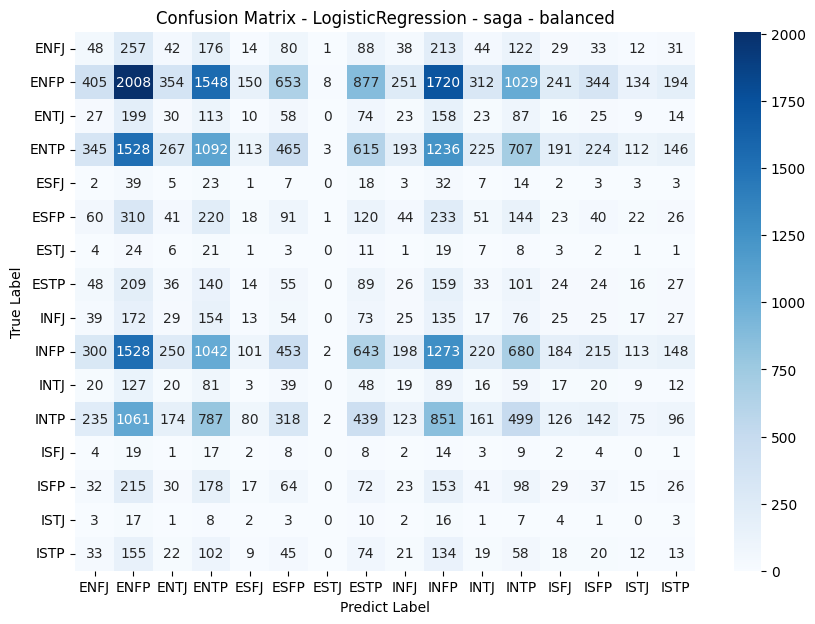

In [137]:
generate_matrix_confusion(log_reg_6, predictions_6)

### lbfgs

In [ ]:
log_reg_7 = LogisticRegression(solver='lbfgs')

log_reg_7.fit(x_train,y_train)
predictions_7 = log_reg_7.predict(x_test)

In [188]:
report_model(log_reg_7, predictions_7)

LogisticRegression - lbfgs - None
              precision    recall  f1-score   support

           0       0.03      0.02      0.02      1228
           1       0.26      0.30      0.28     10228
           2       0.02      0.01      0.02       866
           3       0.19      0.21      0.20      7462
           4       0.00      0.00      0.00       162
           5       0.04      0.01      0.02      1444
           6       0.00      0.00      0.00       112
           7       0.03      0.01      0.01      1001
           8       0.02      0.02      0.02       881
           9       0.19      0.22      0.21      7350
          10       0.01      0.01      0.01       579
          11       0.13      0.16      0.14      5169
          12       0.00      0.00      0.00        94
          13       0.04      0.02      0.03      1030
          14       0.00      0.00      0.00        78
          15       0.02      0.01      0.01       735

    accuracy                           0.19   

g:\Machine-Learning\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
g:\Machine-Learning\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
g:\Machine-Learning\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
g:\Machine-Learning\.venv\Lib\site-pa

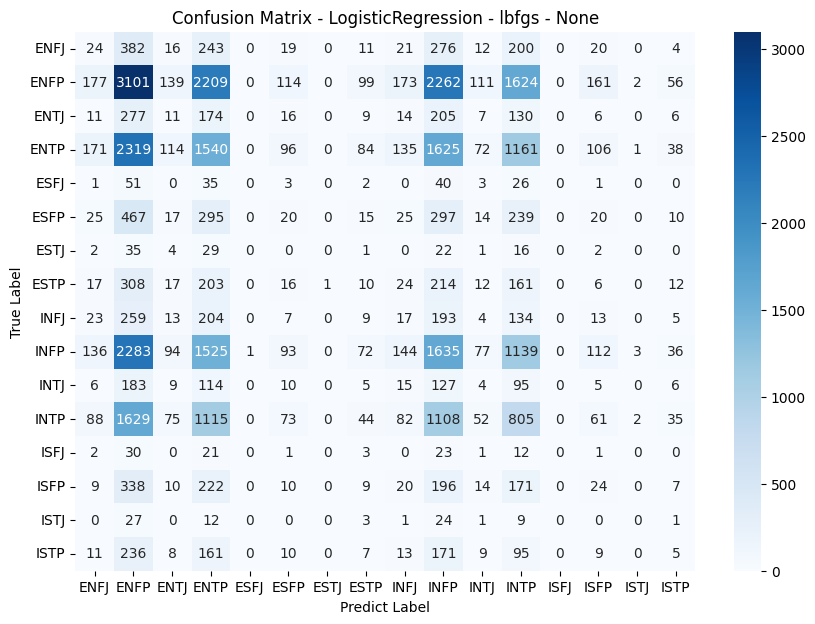

In [139]:
generate_matrix_confusion(log_reg_7, predictions_7)

### lbfgs balanced

In [ ]:
log_reg_8 = LogisticRegression(solver='lbfgs', class_weight='balanced')

log_reg_8.fit(x_train,y_train)
predictions_8 = log_reg_8.predict(x_test)

In [189]:
report_model(log_reg_8, predictions_8)

LogisticRegression - lbfgs - balanced
              precision    recall  f1-score   support

           0       0.03      0.05      0.04      1228
           1       0.25      0.16      0.19     10228
           2       0.02      0.04      0.03       866
           3       0.19      0.13      0.15      7462
           4       0.00      0.02      0.01       162
           5       0.04      0.08      0.05      1444
           6       0.00      0.02      0.00       112
           7       0.03      0.06      0.04      1001
           8       0.02      0.04      0.03       881
           9       0.19      0.11      0.14      7350
          10       0.02      0.03      0.02       579
          11       0.13      0.10      0.11      5169
          12       0.00      0.02      0.00        94
          13       0.03      0.06      0.04      1030
          14       0.00      0.01      0.00        78
          15       0.01      0.03      0.02       735

    accuracy                           0.1

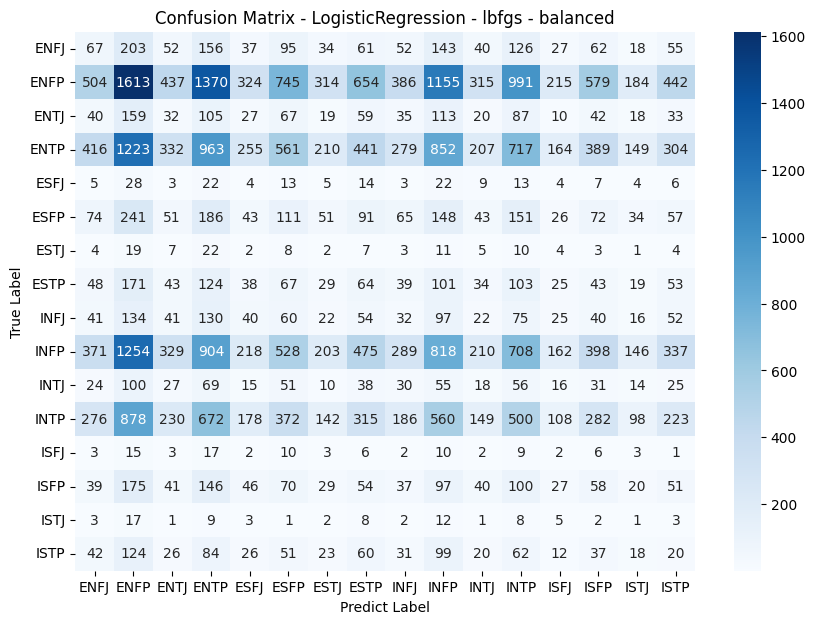

In [140]:
generate_matrix_confusion(log_reg_8, predictions_8)

## 5. Model Evaluation

The most effective model is `Logistic Regression with the Newton-CG solver and without balanced class weighting`, achieving an `accuracy of 82.61%` and an `F1-score of 0.82`. This model shows a strong balance between precision and recall, suggesting that it performs well on the overall classification.

 In comparison, the second-best model, also with `Newton-CG but using balanced weighting`, underperforms, with an `F1-score of 0.78`, indicating that it might be less prone to overfitting. However, models with the `Sag, Saga, and Lbfgs` solvers—both with and without balanced weighting—significantly underperform, with `accuracies around 11-17%`, suggesting that they are not suitable for this dataset. This highlights the importance of properly selecting the solver and balancing technique when implementing logistic regressions.

In [192]:
pd.DataFrame(list_report,columns=['model','accuracy','f1_score','precision','recall'])

,model,accuracy,f1_score,precision,recall
0,LogisticRegression - newton-cg - None,0.826076,0.822679,0.821617,0.826076
1,LogisticRegression - newton-cg - balanced,0.764518,0.778458,0.815118,0.764518
2,LogisticRegression - sag - None,0.172597,0.168800,0.165290,0.172597
3,LogisticRegression - sag - balanced,0.117364,0.122100,0.160197,0.117364
4,LogisticRegression - saga - None,0.175044,0.170186,0.165811,0.175044
5,LogisticRegression - saga - balanced,0.135974,0.148503,0.166727,0.135974
6,LogisticRegression - lbfgs - None,0.187303,0.175951,0.167419,0.187303
7,LogisticRegression - lbfgs - balanced,0.112054,0.131062,0.165167,0.112054
